# Etapas

1. aa

2. aa

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
tickers = ['BBAS3.SA', 'BBDC4.SA', 'ITUB4.SA', 'SANB11.SA', #'BPAC11.SA', 
           'BBSE3.SA', 'SULA11.SA', 
           'EGIE3.SA', 'TAEE11.SA', 'TRPL4.SA', 
           'VIVT3.SA', 
           'B3SA3.SA', 
           '^BVSP']

In [3]:
inicio = '01-07-2015'
fim = 'today'

In [4]:
''' para comentar em bloco: ctrl + / (do teclado numérico)'''
# prices = pd.DataFrame()
# for ticker in tickers:
#     prices[ticker] = data.DataReader(ticker, data_source='yahoo', start=inicio, end=fim)['Adj Close']
# prices.index.name = 'Date'
# prices = prices.rename(columns = {'^BVSP':'IBOV'})
# prices.to_csv('portfolio.csv')

portfolio = pd.read_csv('portfolio.csv', header=0, index_col=0, na_values=-99.99)
prices = portfolio.iloc[:,:-1]
prices

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA,BBSE3.SA,SULA11.SA,EGIE3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA,B3SA3.SA
Date,,,,,,,,,,,
2015-01-07,16.692976,13.443261,14.683122,9.158340,18.760674,7.510599,18.188354,9.703045,6.259582,23.498070,2.584127
2015-01-08,16.749851,13.512504,14.912804,9.006276,18.704763,7.400434,18.374756,9.795747,6.300130,24.453323,2.549531
2015-01-09,16.024683,12.925794,14.260676,8.916422,18.095974,7.361556,16.963367,9.728792,5.778998,24.063673,2.482998
2015-01-12,15.747421,12.696212,13.916153,8.736712,18.512188,7.316191,16.484030,9.620644,5.762479,24.101387,2.411143
2015-01-13,15.654994,12.736299,13.899748,8.715975,18.127035,7.270832,16.622501,9.785449,5.759475,24.742416,2.416465
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,30.549999,24.600000,27.980000,38.180000,23.389999,34.580002,39.402885,38.240002,25.370001,43.799999,17.616667
2021-05-12,30.350000,24.100000,27.570000,37.470001,23.020000,33.000000,38.580002,37.380001,24.700001,42.650002,17.166666
2021-05-13,31.160000,24.660000,28.370001,38.520000,23.370001,33.070000,39.650002,38.099998,24.770000,42.889999,17.250000


In [5]:
ibov = portfolio[['IBOV']]
ibov

,IBOV
Date,
2015-01-07,49463.0
2015-01-08,49943.0
2015-01-09,48840.0
2015-01-12,48140.0
2015-01-13,48042.0
...,...
2021-05-11,122964.0
2021-05-12,119710.0
2021-05-13,120706.0


## Pergunta 1: como lidar com dados faltantes do BPAC??

tirei ele do portfolio, pq n sei lidar com a falta de dados

In [6]:
rets = prices.pct_change().dropna()
rets

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA,BBSE3.SA,SULA11.SA,EGIE3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA,B3SA3.SA
Date,,,,,,,,,,,
2015-01-08,0.003407,0.005151,0.015643,-0.016604,-0.002980,-0.014668,0.010248,0.009554,0.006478,0.040652,-0.013388
2015-01-09,-0.043294,-0.043420,-0.043729,-0.009977,-0.032547,-0.005254,-0.076811,-0.006835,-0.082718,-0.015934,-0.026096
2015-01-12,-0.017302,-0.017762,-0.024159,-0.020155,0.023000,-0.006162,-0.028257,-0.011116,-0.002858,0.001567,-0.028939
2015-01-13,-0.005869,0.003157,-0.001179,-0.002374,-0.020805,-0.006200,0.008400,0.017130,-0.000521,0.026597,0.002208
2015-01-14,0.007266,0.010586,0.006787,0.013481,-0.017135,0.042781,0.054149,0.014211,0.010952,0.011176,0.019824
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,0.007254,-0.001623,-0.002140,-0.006764,0.026327,0.019758,0.006266,0.002096,0.000789,0.005971,-0.008443
2021-05-12,-0.006547,-0.020325,-0.014653,-0.018596,-0.015819,-0.045691,-0.020884,-0.022490,-0.026409,-0.026256,-0.025544
2021-05-13,0.026689,0.023236,0.029017,0.028022,0.015204,0.002121,0.027735,0.019262,0.002834,0.005627,0.004854


In [7]:
rets.describe()

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA,BBSE3.SA,SULA11.SA,EGIE3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA,B3SA3.SA
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,0.000843,0.000685,0.000656,0.001224,0.000352,0.001226,0.000631,0.001034,0.001024,0.000582,0.001503
std,0.029435,0.024119,0.021203,0.024272,0.020442,0.024014,0.016139,0.015771,0.015808,0.019789,0.023876
min,-0.211712,-0.142744,-0.120466,-0.134740,-0.102251,-0.175325,-0.096285,-0.083085,-0.092402,-0.123589,-0.161203
25%,-0.014474,-0.012137,-0.011434,-0.012492,-0.011040,-0.012221,-0.008427,-0.008227,-0.007608,-0.009657,-0.011356
50%,0.000050,0.000272,0.000000,0.000358,0.000314,0.000000,0.000209,0.000359,0.000670,0.000000,0.000379
75%,0.014992,0.013334,0.011972,0.015281,0.011295,0.014510,0.009426,0.010039,0.009850,0.010998,0.014613
max,0.171261,0.168669,0.110593,0.134101,0.109071,0.175989,0.099224,0.087322,0.102339,0.123216,0.192447


<Figure size 432x288 with 0 Axes>

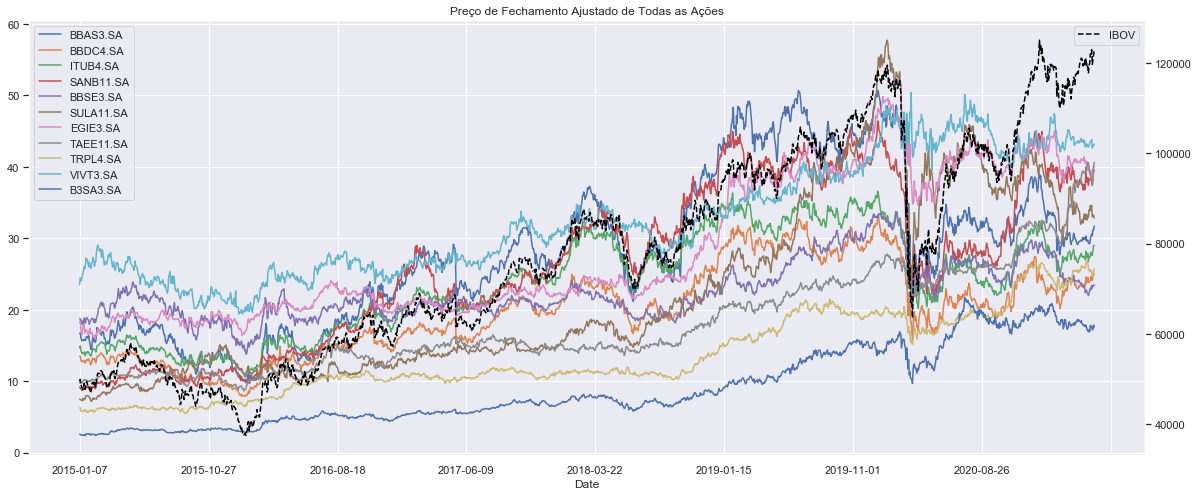

In [21]:
fig = plt.figure()
ax1 = prices.plot(figsize=(20,8), title='Preço de Fechamento Ajustado de Todas as Ações')
ax2 = ax1.twinx()
ibov.plot(ax=ax2, color='black', style='--')
plt.legend()
plt.grid()

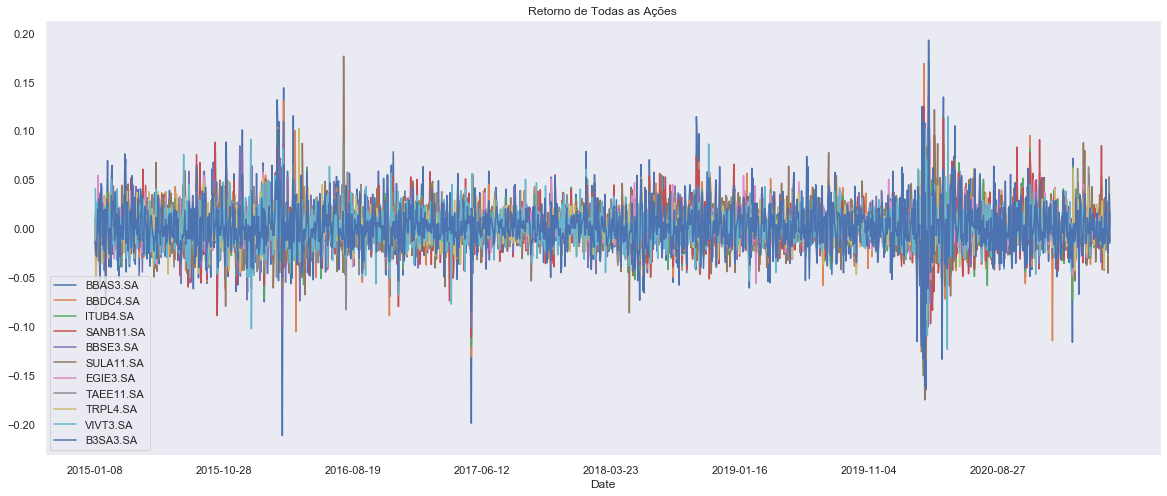

In [9]:
rets.plot(figsize=(20,8), title='Retorno de Todas as Ações')
plt.legend()
plt.grid()

In [29]:
corr_rets_ibov = rets.join(ibov)
corr_rets_ibov

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA,BBSE3.SA,SULA11.SA,EGIE3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA,B3SA3.SA,IBOV
Date,,,,,,,,,,,,
2015-01-08,0.003407,0.005151,0.015643,-0.016604,-0.002980,-0.014668,0.010248,0.009554,0.006478,0.040652,-0.013388,49943.0
2015-01-09,-0.043294,-0.043420,-0.043729,-0.009977,-0.032547,-0.005254,-0.076811,-0.006835,-0.082718,-0.015934,-0.026096,48840.0
2015-01-12,-0.017302,-0.017762,-0.024159,-0.020155,0.023000,-0.006162,-0.028257,-0.011116,-0.002858,0.001567,-0.028939,48140.0
2015-01-13,-0.005869,0.003157,-0.001179,-0.002374,-0.020805,-0.006200,0.008400,0.017130,-0.000521,0.026597,0.002208,48042.0
2015-01-14,0.007266,0.010586,0.006787,0.013481,-0.017135,0.042781,0.054149,0.014211,0.010952,0.011176,0.019824,47646.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,0.007254,-0.001623,-0.002140,-0.006764,0.026327,0.019758,0.006266,0.002096,0.000789,0.005971,-0.008443,122964.0
2021-05-12,-0.006547,-0.020325,-0.014653,-0.018596,-0.015819,-0.045691,-0.020884,-0.022490,-0.026409,-0.026256,-0.025544,119710.0
2021-05-13,0.026689,0.023236,0.029017,0.028022,0.015204,0.002121,0.027735,0.019262,0.002834,0.005627,0.004854,120706.0


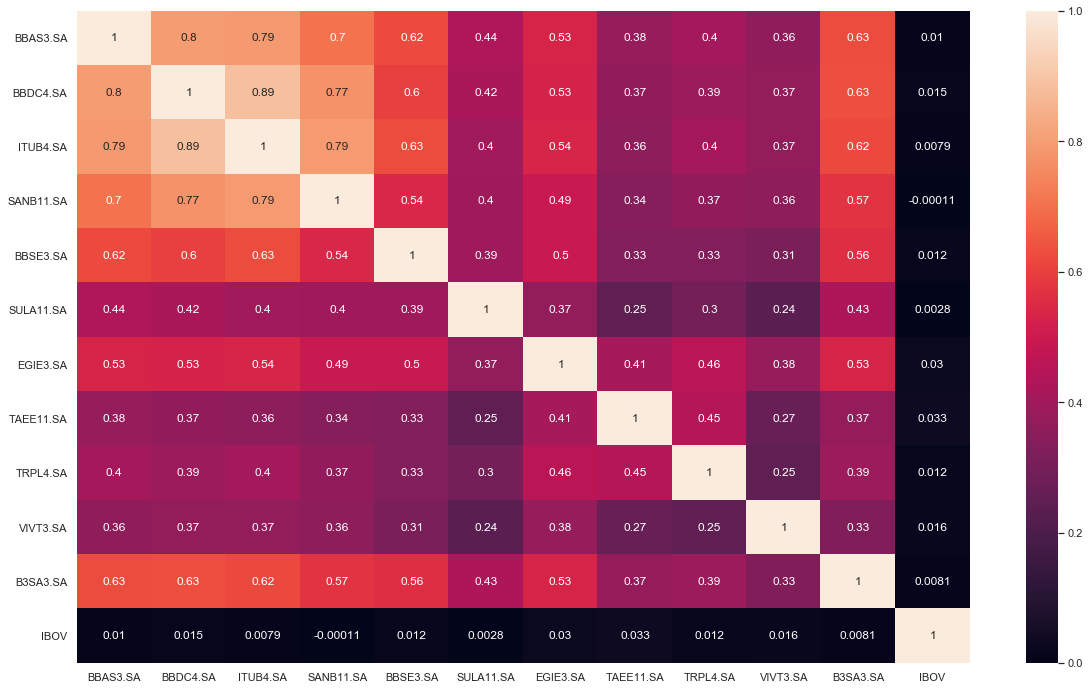

In [30]:
plt.figure(figsize = (20,12))
ax = sns.heatmap(corr_rets_ibov.corr(), annot = True)

<Figure size 1440x864 with 0 Axes>

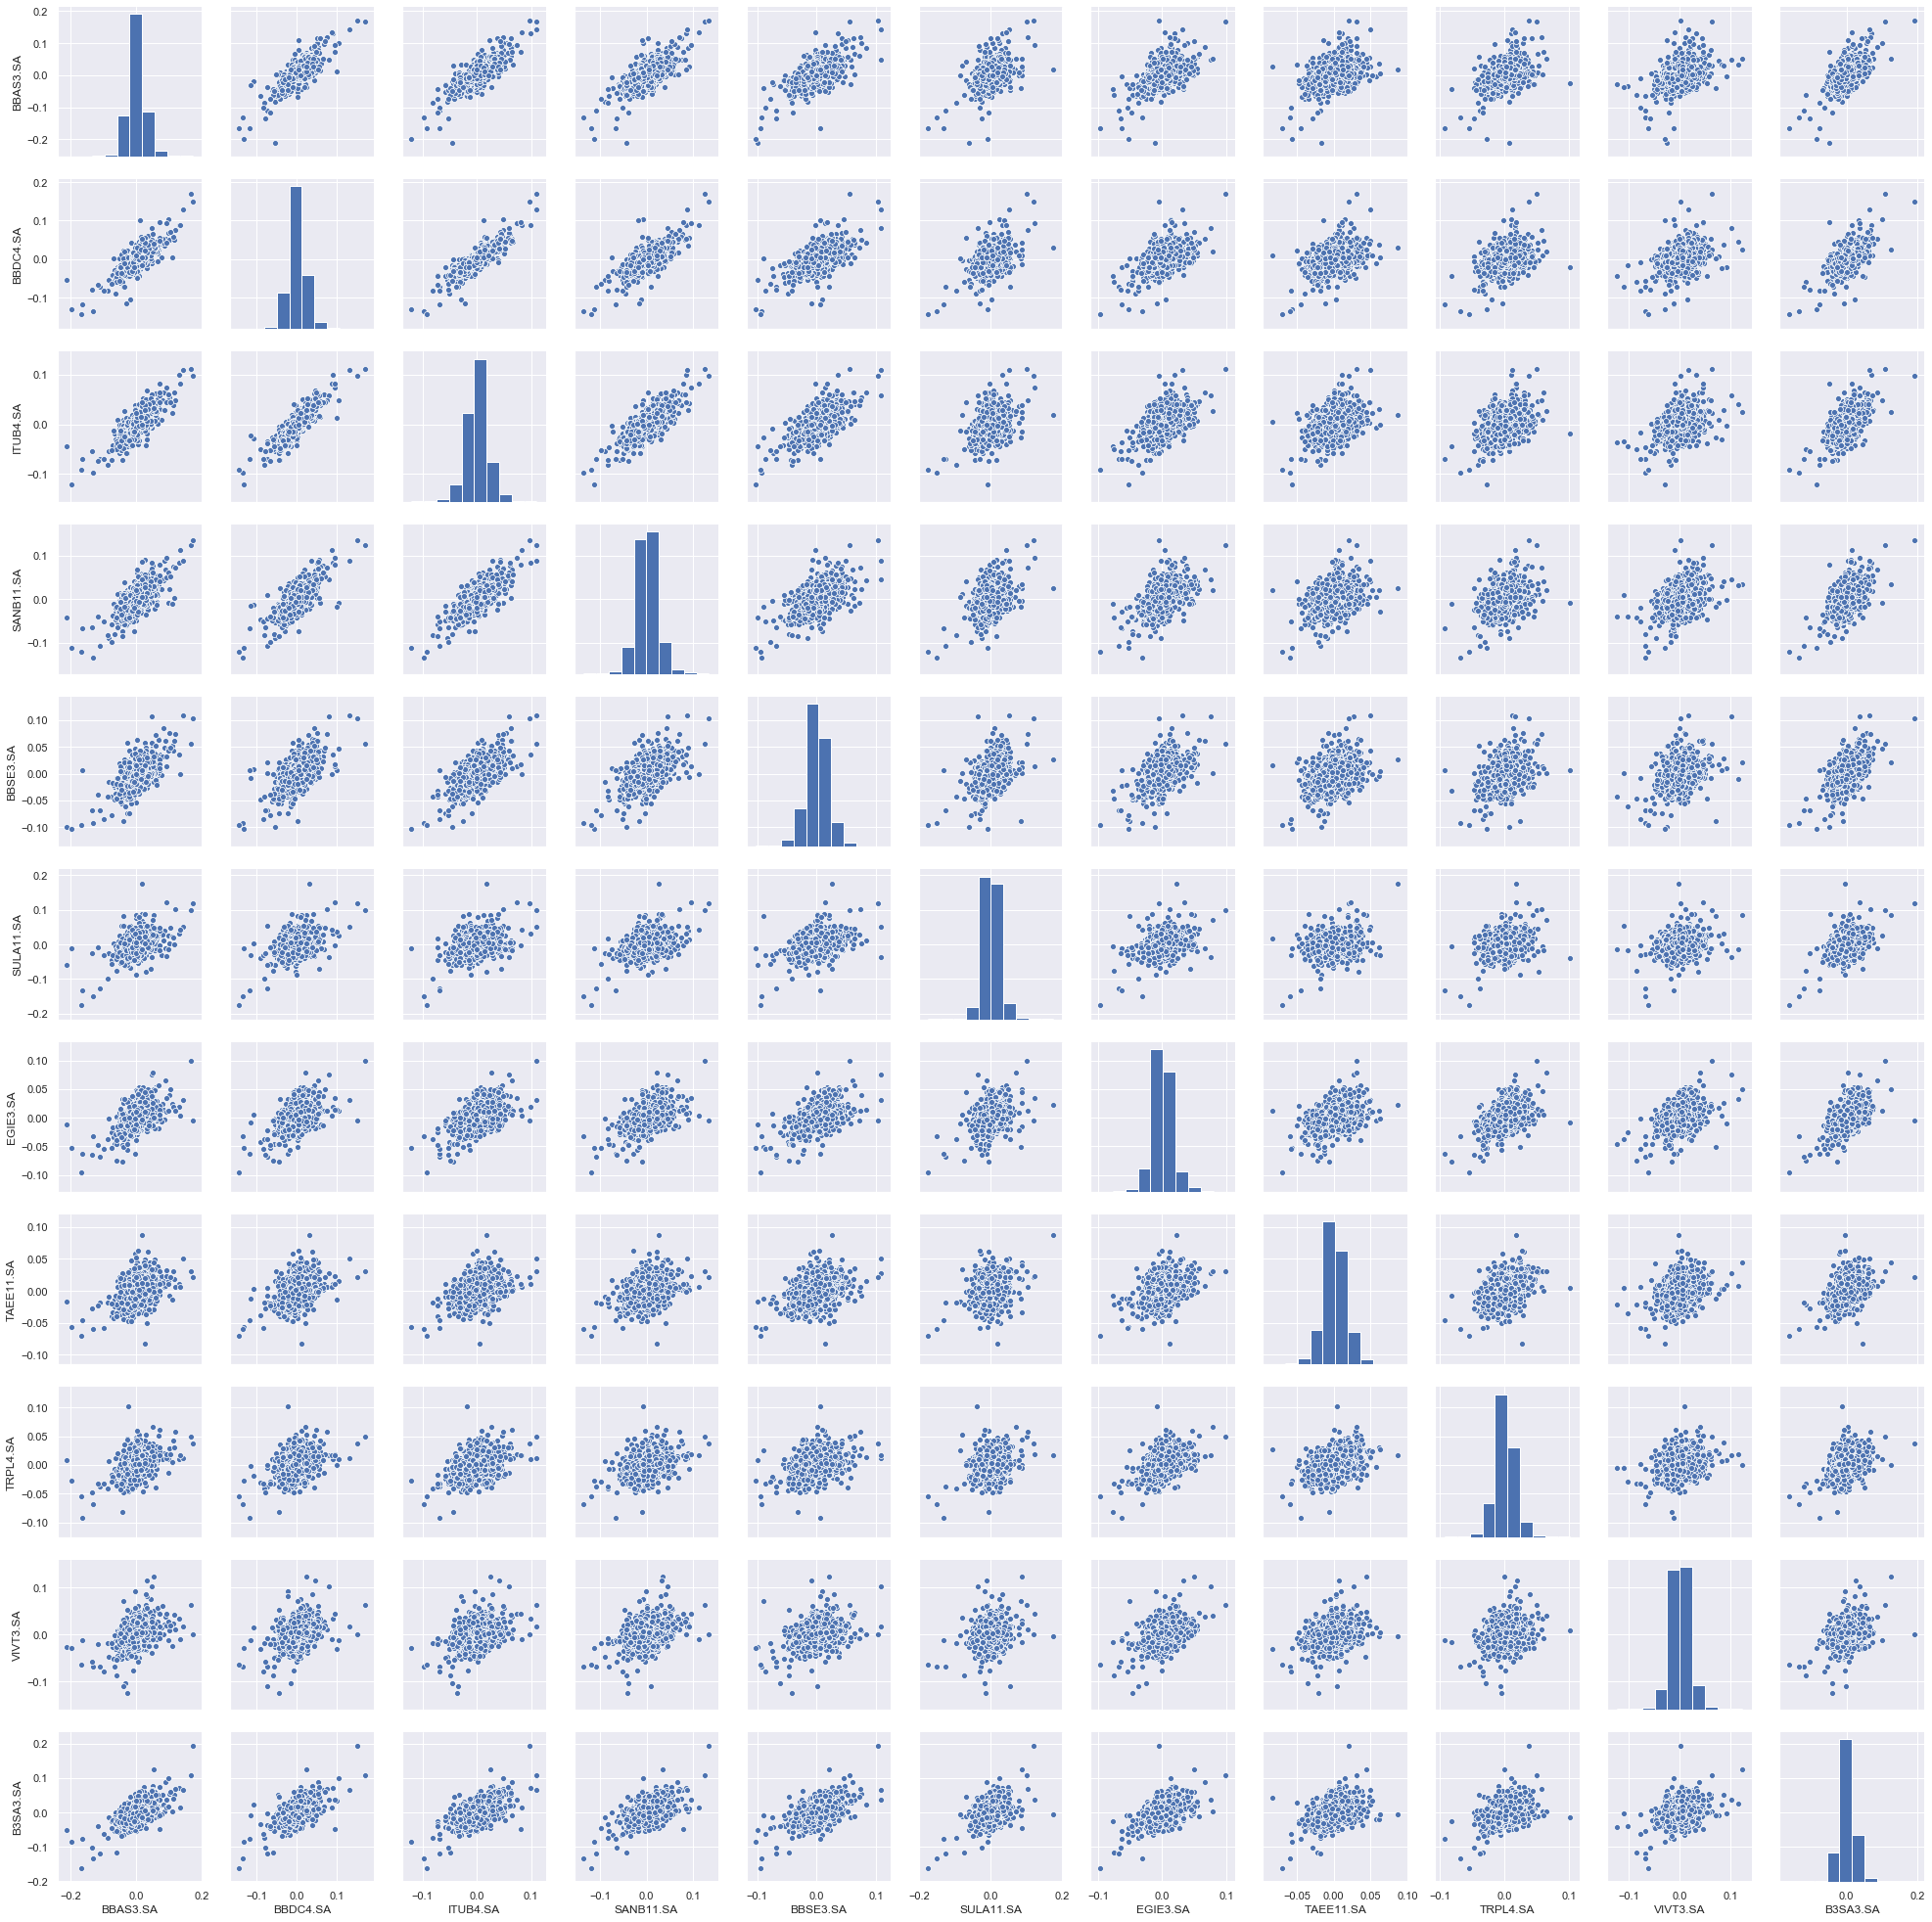

In [11]:
plt.figure(figsize = (20,12))
ax = sns.pairplot(rets)

## Retorno do Ibovespa no período

In [12]:
# ibov = data.DataReader('^BVSP', data_source='yahoo', start=inicio, end=fim)['Adj Close']
ibov_rets = ibov.pct_change().dropna()
ibov_rets

,IBOV
Date,
2015-01-08,0.009704
2015-01-09,-0.022085
2015-01-12,-0.014333
2015-01-13,-0.002036
2015-01-14,-0.008243
...,...
2021-05-11,0.008654
2021-05-12,-0.026463
2021-05-13,0.008320


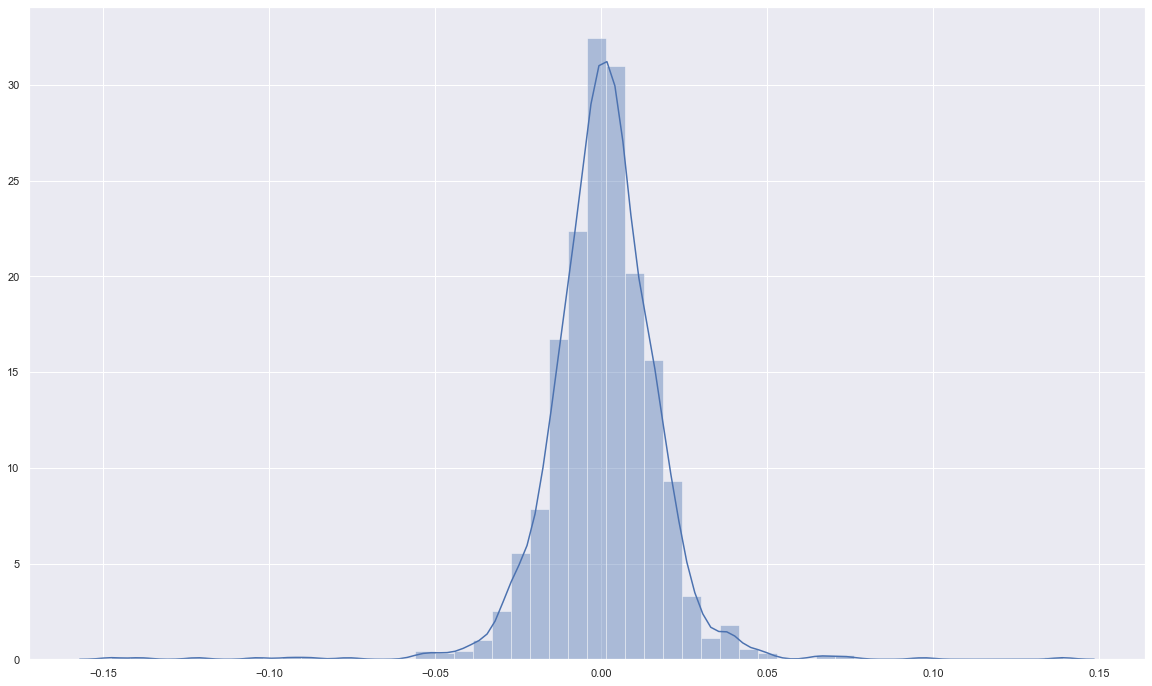

In [13]:
plt.figure(figsize = (20,12))
ax = sns.distplot(ibov_rets)

In [25]:
rets_sum = (rets + 1).cumprod()
rets_sum_ibov = (ibov_rets+1).cumprod()
rets_sum

,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB11.SA,BBSE3.SA,SULA11.SA,EGIE3.SA,TAEE11.SA,TRPL4.SA,VIVT3.SA,B3SA3.SA
Date,,,,,,,,,,,
2015-01-08,1.003407,1.005151,1.015643,0.983396,0.997020,0.985332,1.010248,1.009554,1.006478,1.040652,0.986612
2015-01-09,0.959966,0.961507,0.971229,0.973585,0.964570,0.980156,0.932650,1.002654,0.923224,1.024070,0.960865
2015-01-12,0.943356,0.944429,0.947765,0.953962,0.986755,0.974116,0.906296,0.991508,0.920585,1.025675,0.933059
2015-01-13,0.937819,0.947411,0.946648,0.951698,0.966225,0.968076,0.913909,1.008493,0.920105,1.052955,0.935118
2015-01-14,0.944634,0.957441,0.953073,0.964528,0.949669,1.009491,0.963397,1.022824,0.930182,1.064723,0.953656
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-11,1.830111,1.829913,1.905589,4.168878,1.246757,4.604160,2.166380,3.941031,4.052987,1.863983,6.817259
2021-05-12,1.818130,1.792720,1.877666,4.091353,1.227035,4.393791,2.121138,3.852399,3.945951,1.815043,6.643119
2021-05-13,1.866653,1.834376,1.932150,4.206002,1.245691,4.403111,2.179966,3.926602,3.957134,1.825256,6.675367


<Figure size 432x288 with 0 Axes>

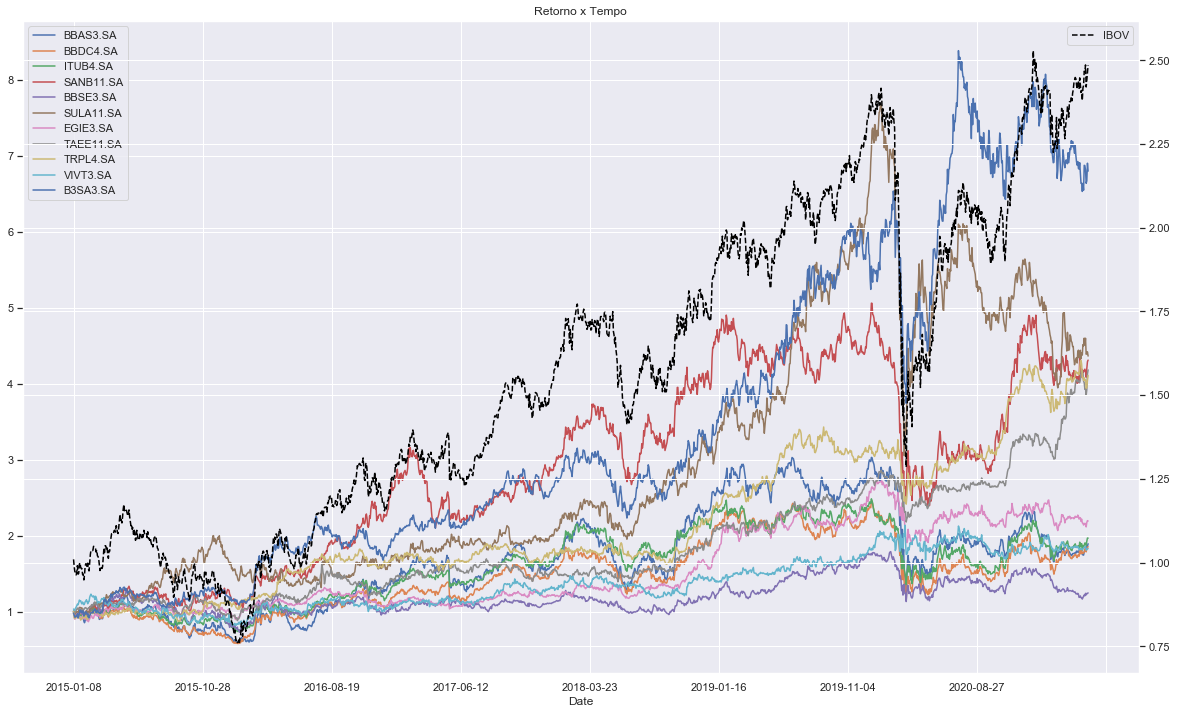

In [27]:
fig = plt.figure()
ax1 = rets_sum.plot(title='Retorno x Tempo', figsize = (20,12))

ax2 = ax1.twinx()
rets_sum_ibov.plot(ax=ax2, color='black', style='--')